In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Problem statement

To predict the car price using various variables


depentent variable:"Price"
    
independent variables:
                    symboling
                    normalized-losses
                    make
                    fuel-type
                    aspiration
                    num-of-doors
                    body-style
                    drive-wheels
                    engine-location
                    wheel-base
                    length
                    width
                    height
                    curb-weight
                    engine type
                    num-of-cylinder
                    engine-size
                    fuel-system	bore
                    stroke
                    compression-ratio
                    horsepower
                    peak-rpm
                    city-mpg
                    highway-mpg	price

## Data gathering

In [2]:
df = pd.read_csv("autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [3]:
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


# EDA

In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
df.axes

[RangeIndex(start=0, stop=205, step=1),
 Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
        'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
        'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
        'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
        'highway-mpg', 'price'],
       dtype='object')]

In [6]:
df.index

RangeIndex(start=0, stop=205, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
df.select_dtypes("O").head().T

,0,1,2,3,4
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
engine-type,dohc,dohc,ohcv,ohc,ohc
num-of-cylinders,four,four,six,four,five


In [10]:
df.select_dtypes("O").shape

(205, 16)

In [11]:
df.select_dtypes(exclude="O").head().T

,0,1,2,3,4
symboling,3.0,3.0,1.0,2.0,2.0
wheel-base,88.6,88.6,94.5,99.8,99.4
length,168.8,168.8,171.2,176.6,176.6
width,64.1,64.1,65.5,66.2,66.4
height,48.8,48.8,52.4,54.3,54.3
curb-weight,2548.0,2548.0,2823.0,2337.0,2824.0
engine-size,130.0,130.0,152.0,109.0,136.0
compression-ratio,9.0,9.0,9.0,10.0,8.0
city-mpg,21.0,21.0,19.0,24.0,18.0
highway-mpg,27.0,27.0,26.0,30.0,22.0


In [12]:
df.select_dtypes(exclude="O").shape

(205, 10)

In [13]:
num_feat = df.select_dtypes(include=["float64","int64"])
num_feat

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,26,27


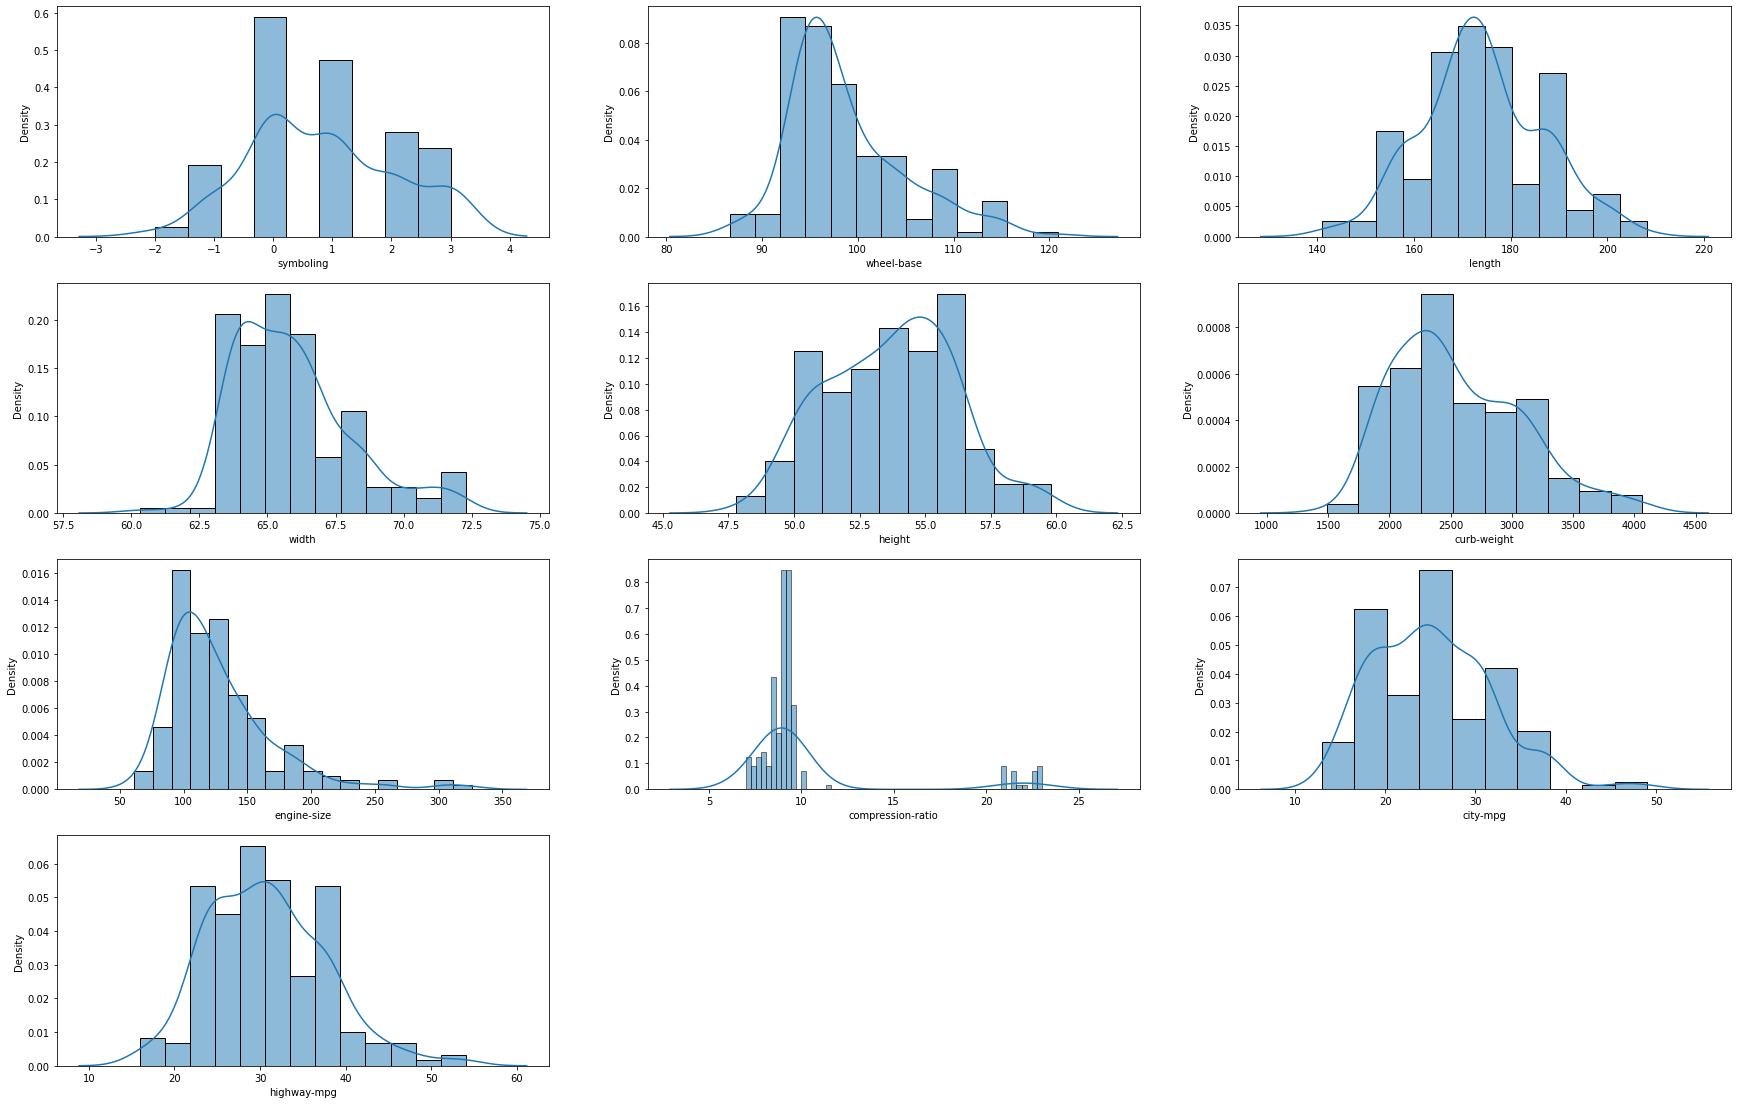

In [14]:
#plotting distributions of numerical features
plt.figure(figsize=(30,50))
for i, col in enumerate(num_feat, 1):

    plt.subplot(10, 3, i)
    sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=3))

<AxesSubplot: >

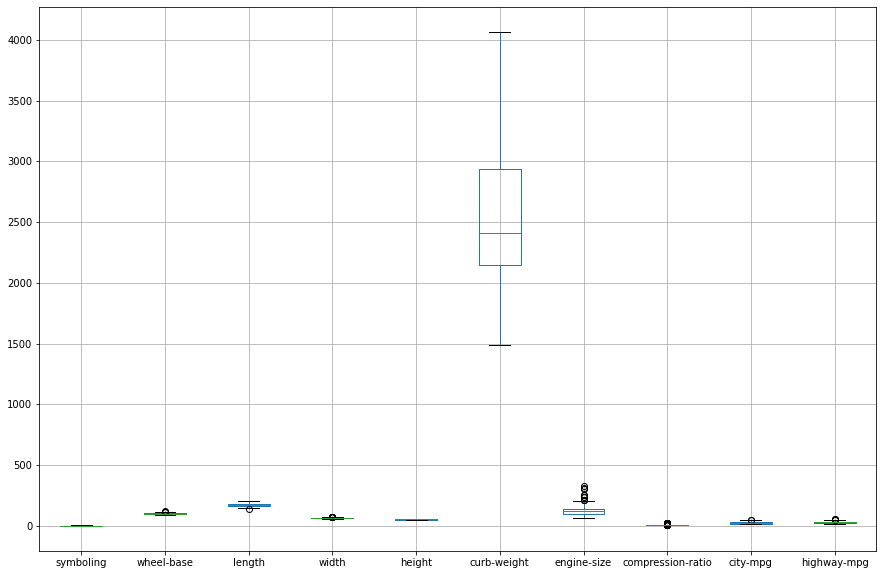

In [15]:
plt.figure(figsize=(15,10))
df.boxplot()

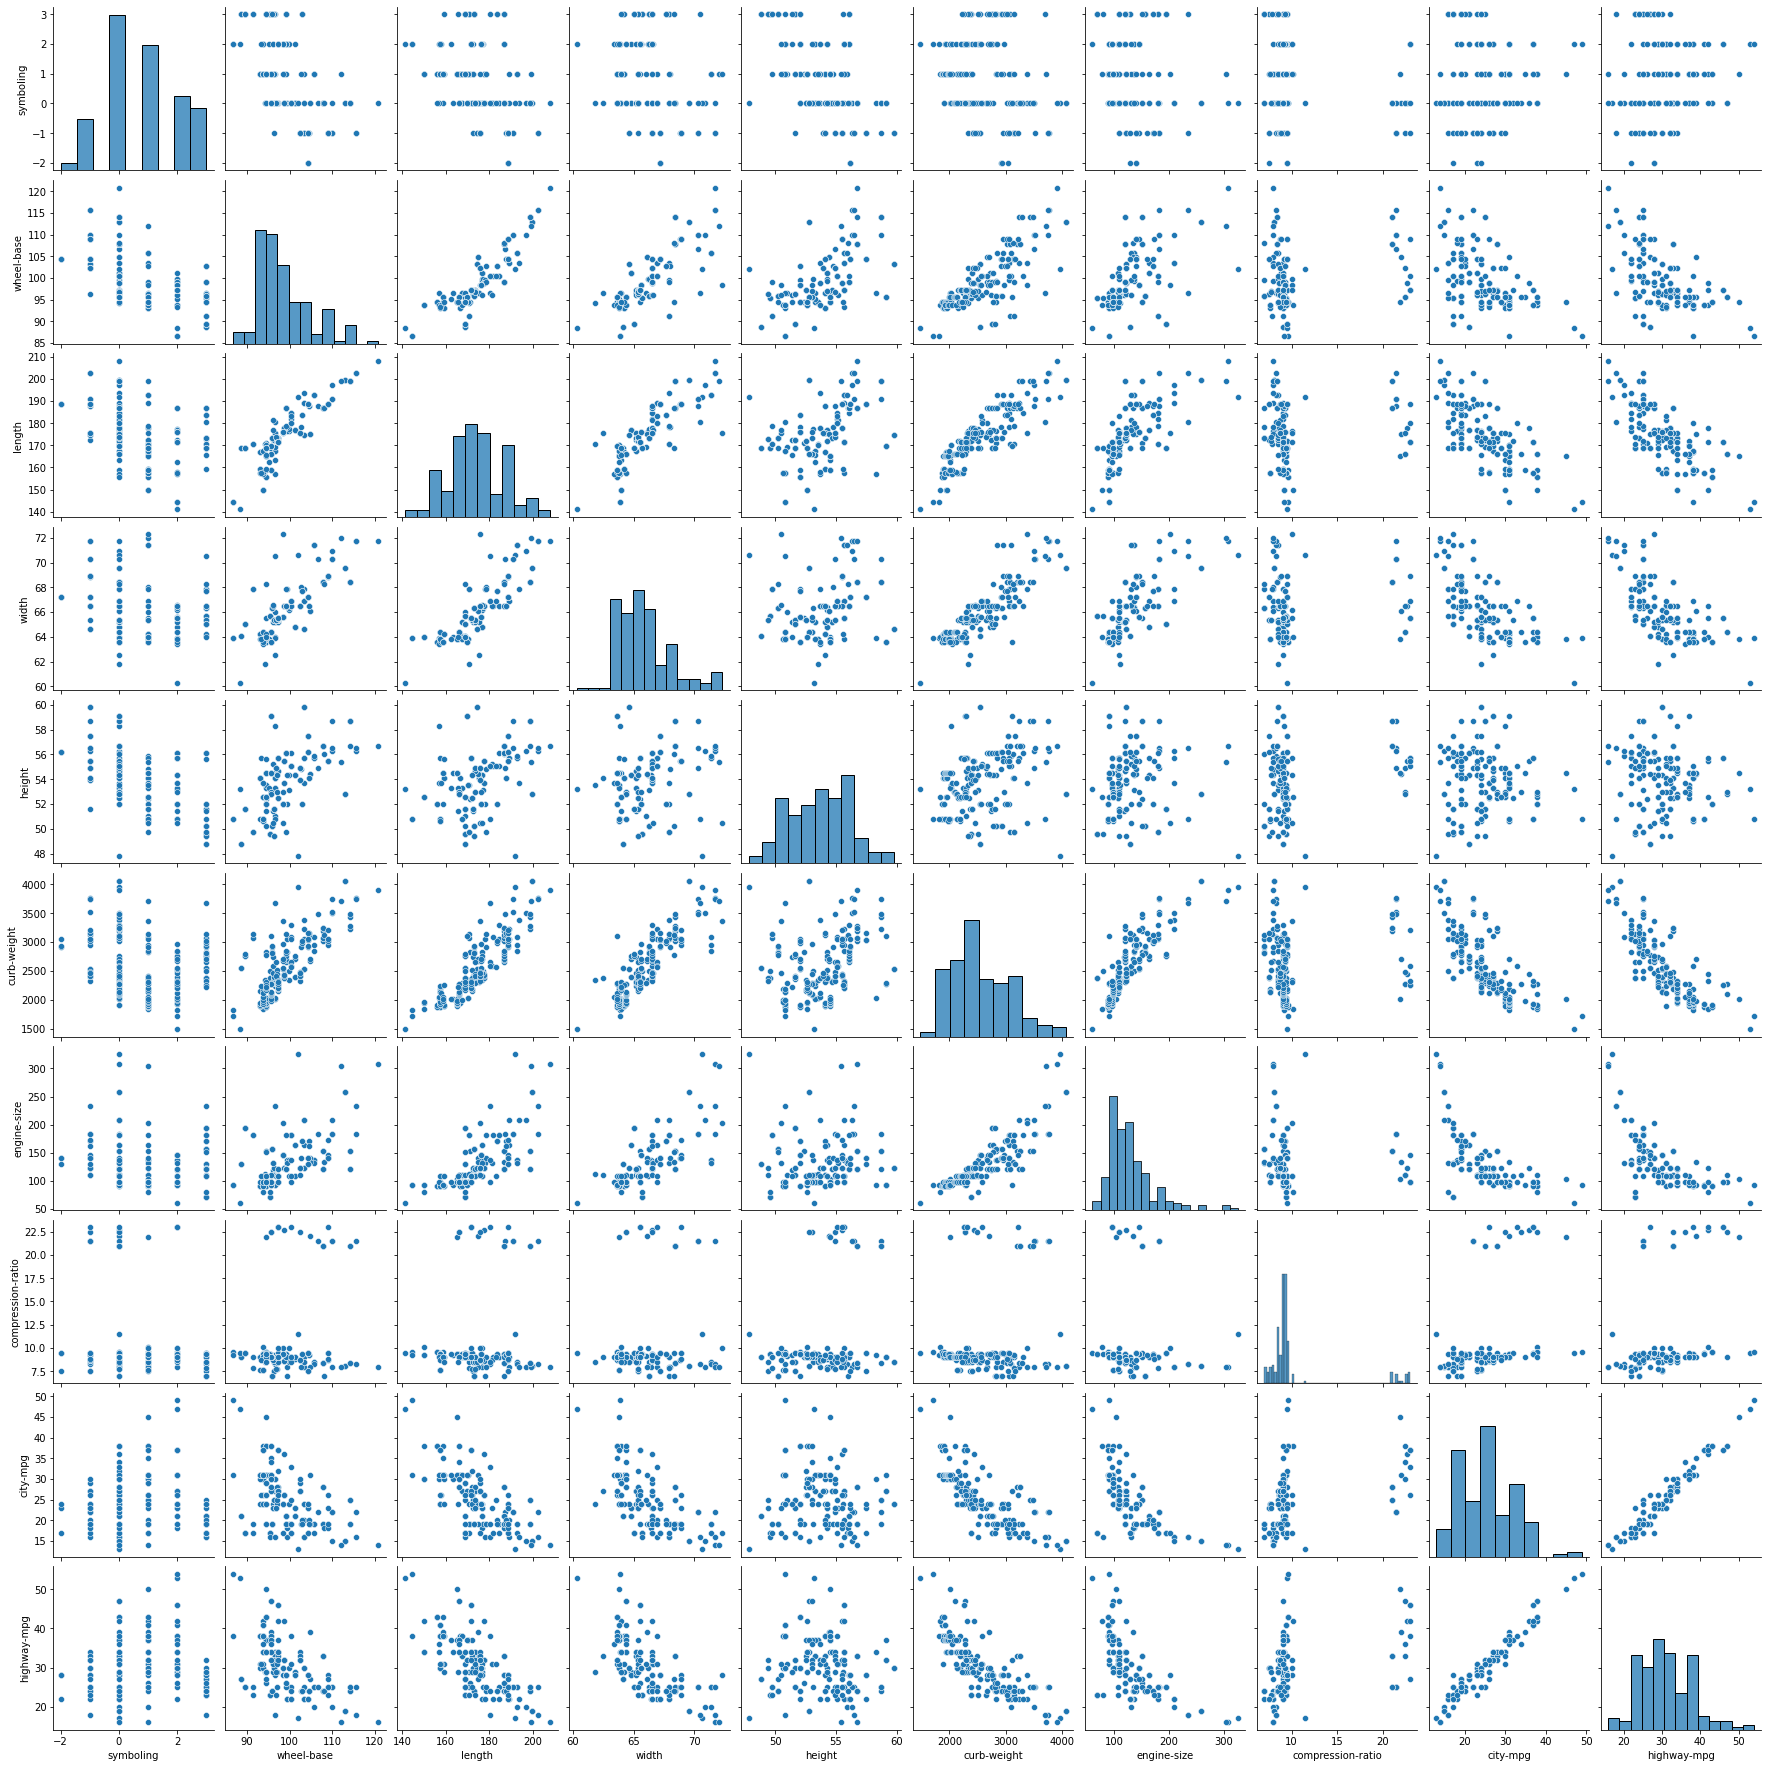

In [16]:
sns.pairplot(df)

<AxesSubplot: >

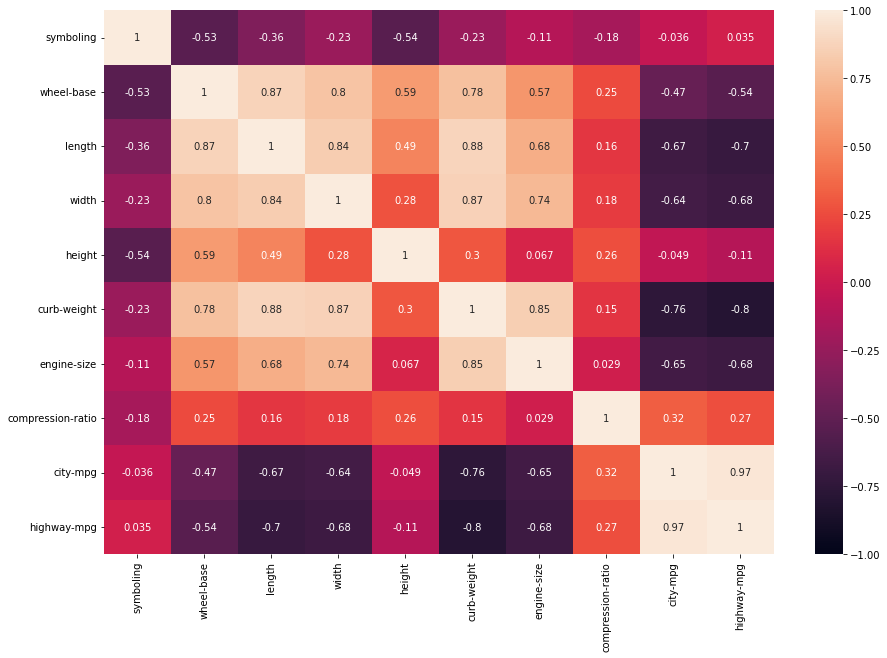

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,vmax = 1, vmin = -1)

In [18]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Feature Engineering

## 1

In [19]:
df["symboling"]

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [20]:
df["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [21]:
df["symboling"].dtype

dtype('int64')

In [22]:
df["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

## 2

In [23]:
df["normalized-losses"]

0        ?
1        ?
2        ?
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [24]:
df["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [25]:
df["normalized-losses"].dtype

dtype('O')

In [26]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [27]:
# converting ananemous data into nan value
df[df["normalized-losses"] == "?"].shape

(41, 26)

In [28]:
 df.replace({"?":np.nan},inplace=True)

In [29]:
df[df["normalized-losses"] == "?"].shape

(0, 26)

In [30]:
df["normalized-losses"].value_counts()

161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: normalized-losses, dtype: int64

In [31]:
df["normalized-losses"].isna().sum()

41

In [32]:
df.isna().mean()*100

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
num-of-doors          0.97561
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64

In [33]:
df["normalized-losses"].dtype

dtype('O')

In [34]:
df["normalized-losses"] = df["normalized-losses"].astype(float)

In [35]:
df["normalized-losses"].mean()

122.0

In [36]:
df["normalized-losses"].median()

115.0

<AxesSubplot: >

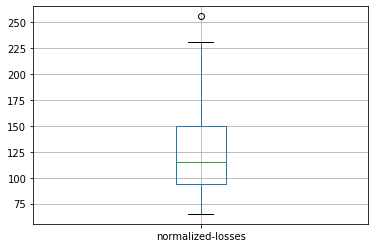

In [37]:
df[["normalized-losses"]].boxplot()

In [38]:
# here the variation of mean and meadian is low but incase if there is outlier
# then its better to replace value with median
df["normalized-losses"] = df["normalized-losses"].fillna(df["normalized-losses"].median())
df["normalized-losses"] = df["normalized-losses"].astype(int)

## 3

In [39]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [40]:
df["make"]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [41]:
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [42]:
df["make"].dtype

dtype('O')

In [43]:
df["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [44]:
df = pd.get_dummies(df,columns=["make"])

In [45]:
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,115,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,115,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,115,gas,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164,gas,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164,gas,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
201,-1,95,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,95,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1


## 4

In [46]:
df["fuel-type"]

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 205, dtype: object

In [47]:
df["fuel-type"].unique()

array(['gas', 'diesel'], dtype=object)

In [48]:
df["fuel-type"].dtype

dtype('O')

In [49]:
df["fuel-type"].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [50]:
df["fuel-type"].replace({"gas":1,"diesel":0},inplace = True)
df["fuel-type"]

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fuel-type, Length: 205, dtype: int64

In [51]:
df["fuel-type"].dtype

dtype('int64')

## 5

In [52]:
df["aspiration"]

0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object

In [53]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [54]:
df["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [55]:
df["aspiration"].replace({"std":1,"turbo":0},inplace=True)
df["aspiration"]

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    0
202    1
203    0
204    0
Name: aspiration, Length: 205, dtype: int64

In [56]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo'],
      dtype='object')

## 6

In [57]:
df["num-of-doors"]

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object

In [58]:
df["num-of-doors"].unique()

array(['two', 'four', nan], dtype=object)

In [59]:
df["num-of-doors"].value_counts().to_dict()

{'four': 114, 'two': 89}

In [60]:
df["num-of-doors"].replace({'four': 4, 'two': 2},inplace = True)
df["num-of-doors"]

0      2.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
200    4.0
201    4.0
202    4.0
203    4.0
204    4.0
Name: num-of-doors, Length: 205, dtype: float64

In [61]:
df["num-of-doors"].dtype

dtype('float64')

In [62]:
df["num-of-doors"].isna().sum()

2

In [63]:
df["num-of-doors"].fillna(df["num-of-doors"].mode()[0],inplace=True)
df["num-of-doors"]=df["num-of-doors"].astype(int)

## 7

In [64]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo'],
      dtype='object')

In [65]:
df["body-style"]

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: body-style, Length: 205, dtype: object

In [66]:
df["body-style"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [67]:
df["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [68]:
df = pd.get_dummies(df,columns=["body-style"])
df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,115,1,1,2,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,3,115,1,1,2,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,1,115,1,1,2,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,164,1,1,4,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,2,164,1,1,4,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0


## 8

In [69]:
df["drive-wheels"]

0      rwd
1      rwd
2      rwd
3      fwd
4      4wd
      ... 
200    rwd
201    rwd
202    rwd
203    rwd
204    rwd
Name: drive-wheels, Length: 205, dtype: object

In [70]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [71]:
df["drive-wheels"].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [72]:
df["drive-wheels"].replace({'fwd': 2, 'rwd': 1, '4wd': 0},inplace=True)
df["drive-wheels"]

0      1
1      1
2      1
3      2
4      0
      ..
200    1
201    1
202    1
203    1
204    1
Name: drive-wheels, Length: 205, dtype: int64

In [73]:
df["drive-wheels"].isna().sum()

0

## 9

In [74]:
df["engine-location"]

0      front
1      front
2      front
3      front
4      front
       ...  
200    front
201    front
202    front
203    front
204    front
Name: engine-location, Length: 205, dtype: object

In [75]:
df["engine-location"].unique()

array(['front', 'rear'], dtype=object)

In [76]:
df["engine-location"].value_counts().to_dict()

{'front': 202, 'rear': 3}

In [77]:
df["engine-location"].isna().sum()

0

In [78]:
df["engine-location"].replace({'front': 1, 'rear': 0},inplace = True)
df["engine-location"]

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    1
204    1
Name: engine-location, Length: 205, dtype: int64

## 10

In [79]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon'],
      dtype='object')

In [80]:
df["wheel-base"]

0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheel-base, Length: 205, dtype: float64

In [81]:
df["wheel-base"].isna().sum()

0

<AxesSubplot: >

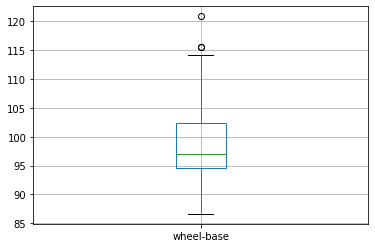

In [82]:
df[["wheel-base"]].boxplot()

<AxesSubplot: ylabel='Density'>

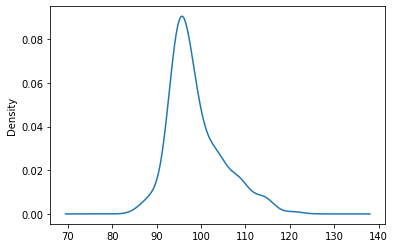

In [83]:
df["wheel-base"].plot(kind="kde")

In [84]:
df["wheel-base"].skew()

1.0502137758714858

In [85]:
df[df["wheel-base"]>=114]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
70,-1,93,0,0,4,1,1,115.6,202.6,71.7,...,0,0,0,0,0,0,0,0,1,0
71,-1,115,1,1,4,1,1,115.6,202.6,71.7,...,0,0,0,0,0,0,0,0,1,0
73,0,115,1,1,4,1,1,120.9,208.1,71.7,...,0,0,0,0,0,0,0,0,1,0
109,0,115,1,1,4,1,1,114.2,198.9,68.4,...,0,0,0,0,0,0,0,0,0,1
110,0,115,0,0,4,1,1,114.2,198.9,68.4,...,0,0,0,0,0,0,0,0,0,1
113,0,115,1,1,4,1,1,114.2,198.9,68.4,...,0,0,0,0,0,0,0,0,0,1
114,0,115,0,0,4,1,1,114.2,198.9,68.4,...,0,0,0,0,0,0,0,0,0,1


In [86]:
df["wheel-base"] = np.where( df["wheel-base"]>=114, df["wheel-base"].mean(), df["wheel-base"])

In [87]:
df[df["wheel-base"]>=114]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon


## 11

In [88]:
df["length"]

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: length, Length: 205, dtype: float64

In [89]:
df["length"].isna().sum()

0

<AxesSubplot: >

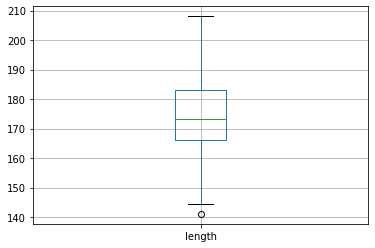

In [90]:
df[["length"]].boxplot()

<AxesSubplot: ylabel='Density'>

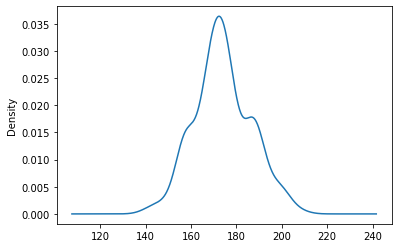

In [91]:
df["length"].plot(kind="kde")

In [92]:
df["wheel-base"].skew()

0.7575532917167518

In [93]:
# This is not count as outlier
df[df["length"]<=145]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
18,2,121,1,1,2,2,1,88.4,141.1,60.3,...,0,0,0,0,0,0,0,1,0,0
30,2,137,1,1,2,2,1,86.6,144.6,63.9,...,0,0,0,0,0,0,0,1,0,0
31,2,137,1,1,2,2,1,86.6,144.6,63.9,...,0,0,0,0,0,0,0,1,0,0


## 12

In [94]:
df["width"]

0      64.1
1      64.1
2      65.5
3      66.2
4      66.4
       ... 
200    68.9
201    68.8
202    68.9
203    68.9
204    68.9
Name: width, Length: 205, dtype: float64

In [95]:
df["width"].isna().sum()

0

<AxesSubplot: >

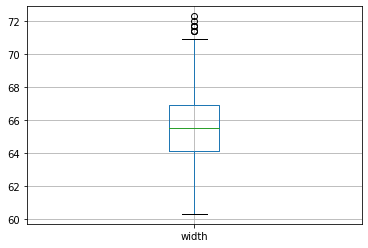

In [96]:
df[["width"]].boxplot()

<AxesSubplot: ylabel='Density'>

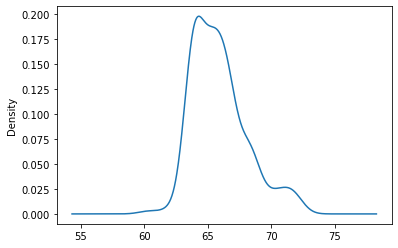

In [97]:
df["width"].plot(kind="kde")

In [98]:
df["width"].skew()

0.904003498786254

In [99]:
# This is not count as outlier
df[df["length"]>=71].T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
normalized-losses,115,115,115,164,164,115,158,115,158,115,...,74,103,74,103,74,95,95,95,95,95
fuel-type,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
aspiration,1,1,1,1,1,1,1,1,0,0,...,1,1,1,0,0,1,0,1,0,0
num-of-doors,2,2,2,4,4,2,4,4,4,2,...,4,4,4,4,4,4,4,4,4,4
drive-wheels,1,1,1,2,0,2,2,2,2,0,...,1,1,1,1,1,1,1,1,1,1
engine-location,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
wheel-base,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1
length,168.8,168.8,171.2,176.6,176.6,177.3,192.7,192.7,192.7,178.2,...,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8
width,64.1,64.1,65.5,66.2,66.4,66.3,71.4,71.4,71.4,67.9,...,67.2,67.2,67.2,67.2,67.2,68.9,68.8,68.9,68.9,68.9


## 13

In [100]:
df["height"]

0      48.8
1      48.8
2      52.4
3      54.3
4      54.3
       ... 
200    55.5
201    55.5
202    55.5
203    55.5
204    55.5
Name: height, Length: 205, dtype: float64

In [101]:
df["height"].isna().sum()

0

<AxesSubplot: >

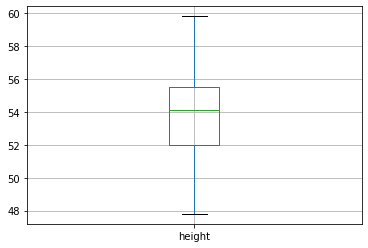

In [102]:
df[["height"]].boxplot()

<AxesSubplot: ylabel='Density'>

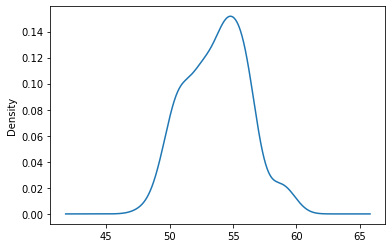

In [103]:
df["height"].plot(kind="kde")

In [104]:
df["height"].skew()

0.06312273247192804

## 14

In [105]:
df["curb-weight"]

0      2548
1      2548
2      2823
3      2337
4      2824
       ... 
200    2952
201    3049
202    3012
203    3217
204    3062
Name: curb-weight, Length: 205, dtype: int64

In [106]:
df["curb-weight"].isna().sum()

0

<AxesSubplot: >

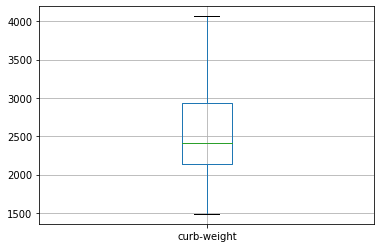

In [107]:
df[["curb-weight"]].boxplot()

## 15

In [108]:
df["engine-type"]

0      dohc
1      dohc
2      ohcv
3       ohc
4       ohc
       ... 
200     ohc
201     ohc
202    ohcv
203     ohc
204     ohc
Name: engine-type, Length: 205, dtype: object

In [109]:
df["engine-type"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [110]:
df = pd.get_dummies(df,columns=["engine-type"])
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,115,1,1,2,1,1,88.6,168.8,64.1,...,0,0,0,1,0,0,0,0,0,0
1,3,115,1,1,2,1,1,88.6,168.8,64.1,...,0,0,0,1,0,0,0,0,0,0
2,1,115,1,1,2,1,1,94.5,171.2,65.5,...,1,0,0,0,0,0,0,0,1,0
3,2,164,1,1,4,2,1,99.8,176.6,66.2,...,0,1,0,0,0,0,1,0,0,0
4,2,164,1,1,4,0,1,99.4,176.6,66.4,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,1,1,4,1,1,109.1,188.8,68.9,...,0,1,0,0,0,0,1,0,0,0
201,-1,95,1,0,4,1,1,109.1,188.8,68.8,...,0,1,0,0,0,0,1,0,0,0
202,-1,95,1,1,4,1,1,109.1,188.8,68.9,...,0,1,0,0,0,0,0,0,1,0
203,-1,95,0,0,4,1,1,109.1,188.8,68.9,...,0,1,0,0,0,0,1,0,0,0


## 16

In [111]:
df["num-of-cylinders"]

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num-of-cylinders, Length: 205, dtype: object

In [112]:
df["num-of-cylinders"].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

<AxesSubplot: xlabel='num-of-cylinders', ylabel='count'>

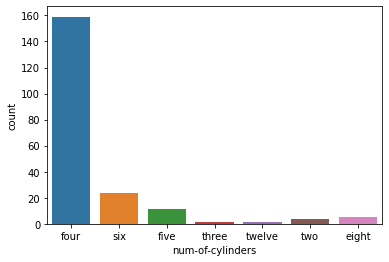

In [113]:
sns.countplot(df["num-of-cylinders"])

In [114]:
df["num-of-cylinders"].replace({'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12},inplace=True)

In [115]:
df["num-of-cylinders"]

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: num-of-cylinders, Length: 205, dtype: int64

In [116]:
df["num-of-cylinders"].isna().sum()

0

## 17

In [117]:
df["engine-size"]

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: engine-size, Length: 205, dtype: int64

In [118]:
df["engine-size"].isna().sum()

0

<AxesSubplot: >

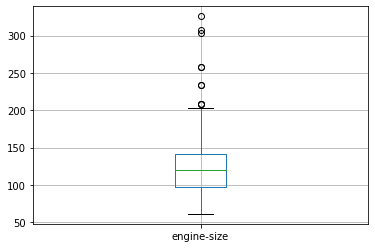

In [119]:
df[["engine-size"]].boxplot()

In [120]:
df[df["engine-size"]>=200].head().T

,15,16,17,47,48
symboling,0,0,0,0,0
normalized-losses,115,115,115,145,115
fuel-type,1,1,1,1,1
aspiration,1,1,1,1,1
num-of-doors,4,2,4,4,4
drive-wheels,1,1,1,1,1
engine-location,1,1,1,1,1
wheel-base,103.5,103.5,110.0,113.0,113.0
length,189.0,193.8,197.0,199.6,199.6
width,66.9,67.9,70.9,69.6,69.6


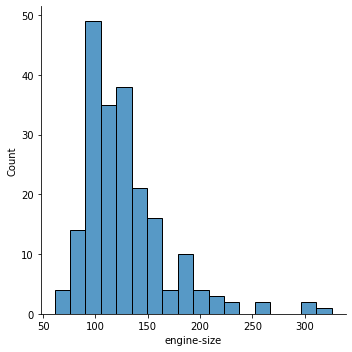

In [121]:
sns.displot(df["engine-size"])

<AxesSubplot: xlabel='engine-size', ylabel='Density'>

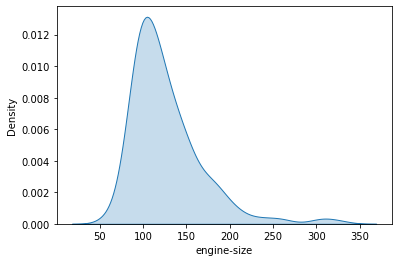

In [122]:
sns.kdeplot(df["engine-size"],fill=True)

In [123]:
df["engine-size"].mean()

126.90731707317073

In [124]:
df["engine-size"].median()

120.0

In [125]:
df["engine-size"]  = np.where(df["engine-size"]>=200, df["engine-size"].median(), df["engine-size"])

<AxesSubplot: >

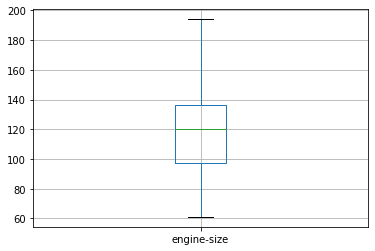

In [126]:
df[["engine-size"]].boxplot()

## 18

In [127]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'engine-type_dohc', 'engine-type_dohcv', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
      

In [128]:
df["fuel-system"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [129]:
df["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [130]:
df = pd.get_dummies(df,columns=["fuel-system"])

## 19

In [131]:
df.bore

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

In [132]:
df["bore"].isna().sum()

4

In [133]:
df["bore"].median()

3.31

In [134]:
df["bore"].mode()

0    3.62
dtype: object

In [135]:
df["bore"].fillna(df["bore"].median(),inplace = True)

In [136]:
df["bore"].isna().sum()

0

In [137]:
df["bore"].dtype

dtype('O')

In [138]:
df["bore"] = df["bore"].astype(float)

## 20

In [139]:
df["stroke"]

0      2.68
1      2.68
2      3.47
3       3.4
4       3.4
       ... 
200    3.15
201    3.15
202    2.87
203     3.4
204    3.15
Name: stroke, Length: 205, dtype: object

In [140]:
df["stroke"].isna().sum()

4

In [141]:
df["stroke"].dtype

dtype('O')

In [142]:
df["stroke"]=df["stroke"].astype(float)
df["stroke"].describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [143]:
df["stroke"].fillna(3.25,inplace=True)
df["stroke"].isna().sum()

0

## 21

In [144]:
df["compression-ratio"]

0       9.0
1       9.0
2       9.0
3      10.0
4       8.0
       ... 
200     9.5
201     8.7
202     8.8
203    23.0
204     9.5
Name: compression-ratio, Length: 205, dtype: float64

In [145]:
df["compression-ratio"].isna().sum()

0

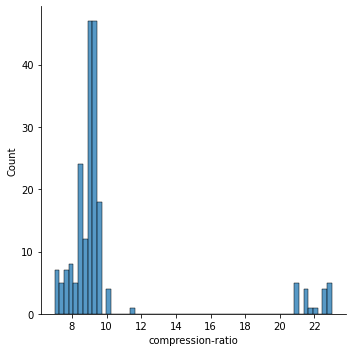

In [146]:
sns.displot(df["compression-ratio"])

<AxesSubplot: xlabel='compression-ratio', ylabel='Density'>

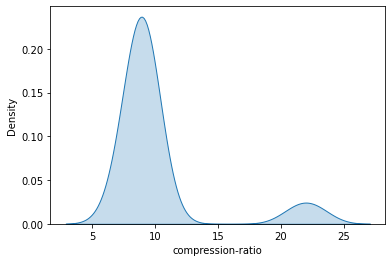

In [147]:
sns.kdeplot(df["compression-ratio"],fill = True)

<AxesSubplot: >

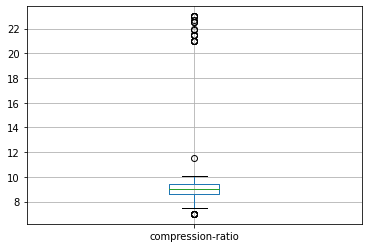

In [148]:
df[["compression-ratio"]].boxplot()

In [149]:
df[df["compression-ratio"]>=20]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
63,0,115,0,1,4,2,1,98.800000,177.8,66.5,...,0,0,0,0,0,1,0,0,0,0
66,0,115,0,1,4,1,1,104.900000,175.0,66.1,...,0,0,0,0,0,1,0,0,0,0
67,-1,93,0,0,4,1,1,110.000000,190.9,70.3,...,0,0,0,0,0,1,0,0,0,0
68,-1,93,0,0,4,1,1,110.000000,190.9,70.3,...,0,0,0,0,0,1,0,0,0,0
69,0,93,0,0,2,1,1,106.700000,187.5,70.3,...,0,0,0,0,0,1,0,0,0,0
70,-1,93,0,0,4,1,1,98.756585,202.6,71.7,...,0,0,0,0,0,1,0,0,0,0
90,1,128,0,1,2,2,1,94.500000,165.3,63.8,...,0,0,0,0,0,1,0,0,0,0
108,0,161,0,0,4,1,1,107.900000,186.7,68.4,...,0,0,0,0,0,1,0,0,0,0
110,0,115,0,0,4,1,1,98.756585,198.9,68.4,...,0,0,0,0,0,1,0,0,0,0
112,0,161,0,0,4,1,1,107.900000,186.7,68.4,...,0,0,0,0,0,1,0,0,0,0


In [150]:
df["compression-ratio"]= np.where(df["compression-ratio"]>=12,df["compression-ratio"].mean(),df["compression-ratio"])

In [151]:
df[df["compression-ratio"]>=20]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


## 22

In [152]:
df.horsepower

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

In [153]:
df["horsepower"].isna().sum()

2

In [154]:
df["horsepower"].dtype

dtype('O')

<AxesSubplot: >

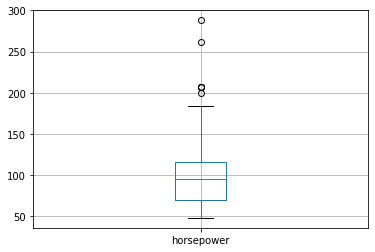

In [155]:
df["horsepower"] = df["horsepower"].astype(float)
df["horsepower"].fillna(df["horsepower"].mean(),inplace = True)
df["horsepower"] = df["horsepower"].astype(int)
df[["horsepower"]].boxplot()

In [156]:
df[df["horsepower"]>=180]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
15,0,115,1,1,4,1,1,103.500000,189.0,66.9,...,0,0,0,0,0,0,0,1,0,0
16,0,115,1,1,2,1,1,103.500000,193.8,67.9,...,0,0,0,0,0,0,0,1,0,0
17,0,115,1,1,4,1,1,110.000000,197.0,70.9,...,0,0,0,0,0,0,0,1,0,0
49,0,115,1,1,2,1,1,102.000000,191.7,70.6,...,1,0,0,0,0,0,0,1,0,0
73,0,115,1,1,4,1,1,98.756585,208.1,71.7,...,1,0,0,0,0,0,0,1,0,0
74,1,115,1,1,2,1,1,112.000000,199.2,72.0,...,1,0,0,0,0,0,0,1,0,0
105,3,194,1,0,2,1,1,91.300000,170.7,67.9,...,1,0,0,0,0,0,0,1,0,0
126,3,115,1,1,2,1,0,89.500000,168.9,65.0,...,0,0,0,0,0,0,0,1,0,0
127,3,115,1,1,2,1,0,89.500000,168.9,65.0,...,0,0,0,0,0,0,0,1,0,0
128,3,115,1,1,2,1,0,89.500000,168.9,65.0,...,0,0,0,0,0,0,0,1,0,0


## 23

In [157]:
df["peak-rpm"]

0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peak-rpm, Length: 205, dtype: object

In [158]:
df["peak-rpm"].dtype

dtype('O')

In [159]:
df["peak-rpm"].isna().sum()

2

In [160]:
df["peak-rpm"] = df["peak-rpm"].astype(float)


<AxesSubplot: >

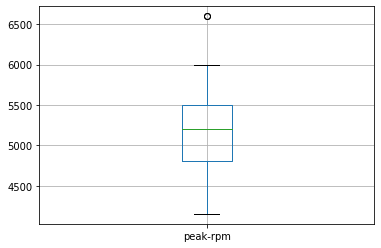

In [161]:
df[["peak-rpm"]].boxplot()

In [162]:
df["peak-rpm"].mean()

5125.369458128079

In [163]:
df["peak-rpm"].median()

5200.0

In [164]:
df["peak-rpm"].fillna(df["peak-rpm"].median(),inplace = True)

In [165]:
df[df["peak-rpm"]>=6000]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
31,2,137,1,1,2,2,1,86.6,144.6,63.9,...,0,0,1,0,0,0,0,0,0,0
33,1,101,1,1,2,2,1,93.7,150.0,64.0,...,0,0,1,0,0,0,0,0,0,0
34,1,101,1,1,2,2,1,93.7,150.0,64.0,...,0,0,1,0,0,0,0,0,0,0
35,0,110,1,1,4,2,1,96.5,163.4,64.0,...,0,0,1,0,0,0,0,0,0,0
36,0,78,1,1,4,2,1,96.5,157.1,63.9,...,0,0,1,0,0,0,0,0,0,0
55,3,150,1,1,2,1,1,95.3,169.0,65.7,...,0,1,0,0,1,0,0,0,0,0
56,3,150,1,1,2,1,1,95.3,169.0,65.7,...,0,1,0,0,1,0,0,0,0,0
57,3,150,1,1,2,1,1,95.3,169.0,65.7,...,0,1,0,0,1,0,0,0,0,0
58,3,150,1,1,2,1,1,95.3,169.0,65.7,...,0,1,0,0,0,0,0,1,0,0
165,1,168,1,1,2,1,1,94.5,168.7,64.0,...,0,0,0,0,0,0,0,1,0,0


## 24

In [166]:
df["city-mpg"]

0      21
1      21
2      19
3      24
4      18
       ..
200    23
201    19
202    18
203    26
204    19
Name: city-mpg, Length: 205, dtype: int64

In [167]:
df["city-mpg"].dtype

dtype('int64')

In [168]:
df["city-mpg"].isna().sum()

0

<AxesSubplot: >

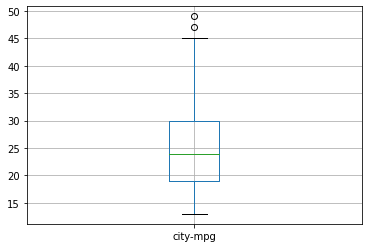

In [169]:
df[["city-mpg"]].boxplot()

In [170]:
df["city-mpg"] = np.where(df["city-mpg"]>=45,df["city-mpg"].mean(),df["city-mpg"])

In [171]:
df[df["city-mpg"]>=45]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


## 25

In [172]:
df["highway-mpg"]

0      27
1      27
2      26
3      30
4      22
       ..
200    28
201    25
202    23
203    27
204    25
Name: highway-mpg, Length: 205, dtype: int64

In [173]:
df["highway-mpg"].dtype

dtype('int64')

<AxesSubplot: >

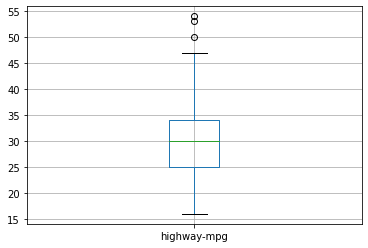

In [174]:
df[["highway-mpg"]].boxplot()

In [175]:
df["highway-mpg"] = np.where(df["highway-mpg"]>=47,df["highway-mpg"].mean(),df["highway-mpg"])

<AxesSubplot: >

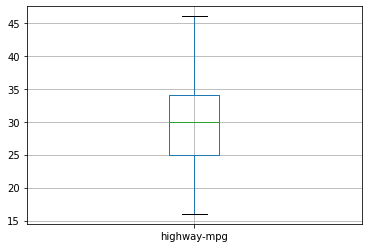

In [176]:
df[["highway-mpg"]].boxplot()

<AxesSubplot: xlabel='highway-mpg', ylabel='Density'>

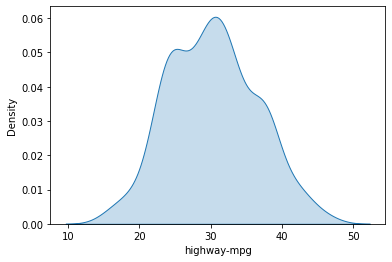

In [177]:
sns.kdeplot(df["highway-mpg"],fill = True)

## 26

In [178]:
df["price"]

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [179]:
df["price"].isna().sum()

4

In [180]:
df["price"].dtype

dtype('O')

In [181]:
df["price"] = df["price"].astype(float)
df["price"].fillna(df["price"].mean(),inplace=True)
df["price"] = df["price"].astype(int)


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    int64  
 6   engine-location         205 non-null    int64  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    int64  
 13  engine-size             205 non-null    float64
 14  bore                    205 non-null    fl

<AxesSubplot: >

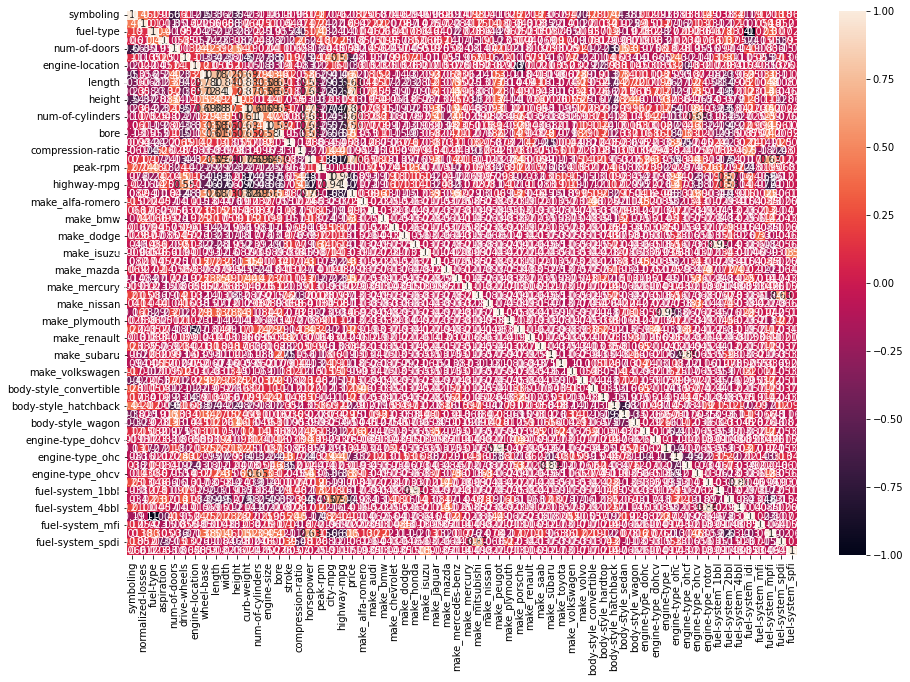

In [183]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot= True)

now their a problem of multicollinearity so we should counter this problem

In [184]:
df.shape

(205, 64)

In [185]:
# their are multicolinearity in dataset several feature show strong positive correlation
# finding correlatd feature
def correlation(dataset,threshold):
    col_corr = set() # set all the names of correlated columns
    corr_matrix= dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [190]:
correated_col = correlation(df,0.9) # we are setting threshold as 0.9
print("Feature showing multicollinearity : ")
correated_col


Feature showing multicollinearity : 


{'engine-type_l', 'fuel-system_1bbl', 'fuel-system_idi', 'highway-mpg'}

In [191]:
# # dealing multicolinearity
df = df.drop(correated_col,axis = 1)
df.shape

(205, 60)

# Feature selection

In [192]:
df.corr()['price'].head(22).sort_values()


city-mpg            -0.683408
drive-wheels        -0.475763
engine-location     -0.331013
aspiration          -0.177285
fuel-type           -0.110207
peak-rpm            -0.101546
compression-ratio   -0.095142
symboling           -0.082201
make_alfa-romero     0.035572
num-of-doors         0.041945
stroke               0.082103
normalized-losses    0.094337
height               0.134388
wheel-base           0.518249
bore                 0.532307
engine-size          0.561187
length               0.682986
num-of-cylinders     0.687769
width                0.728699
horsepower           0.757946
curb-weight          0.820825
price                1.000000
Name: price, dtype: float64

In [193]:
df.corr()['price'].head(22).sort_values().head(4).index

Index(['city-mpg', 'drive-wheels', 'engine-location', 'aspiration'], dtype='object')

In [194]:
df.corr()['price'].head(22).sort_values().tail(9).index

Index(['wheel-base', 'bore', 'engine-size', 'length', 'num-of-cylinders',
       'width', 'horsepower', 'curb-weight', 'price'],
      dtype='object')

In [195]:
df.corr()['price'].head(22).sort_values()[4:13].index

Index(['fuel-type', 'peak-rpm', 'compression-ratio', 'symboling',
       'make_alfa-romero', 'num-of-doors', 'stroke', 'normalized-losses',
       'height'],
      dtype='object')

In [196]:
# seprating feature and matrix
x = df.drop("price",axis = 1)
y = df["price"]

In [197]:
# splitting dataset into train and test dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=11,test_size=0.2)


In [198]:
print("Shape of Train data: ",x_train.shape)
print("Shape of Test data: ",x_test.shape)

Shape of Train data:  (164, 59)
Shape of Test data:  (41, 59)


In [199]:
x_train.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
52,1,104,1,1,2,2,1,93.1,159.1,64.2,...,1,0,0,0,1,0,0,0,0,0
178,3,197,1,1,2,1,1,102.9,183.5,67.7,...,0,0,0,0,0,0,0,1,0,0
30,2,137,1,1,2,2,1,86.6,144.6,63.9,...,1,0,0,0,0,0,0,0,0,0
63,0,115,0,1,4,2,1,98.8,177.8,66.5,...,1,0,0,0,0,0,0,0,0,0
147,0,89,1,1,4,2,1,97.0,173.5,65.4,...,0,1,0,0,0,0,0,1,0,0


In [201]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Building Machine Learning Models

## 1. Linear Regression

### Model Training

In [203]:
# intantiate model
lin_model = LinearRegression()
# train the model
lin_model.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [204]:
y_pred = lin_model.predict(x_test)


In [206]:
##Evaluation of model
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse= np.sqrt(mse)


In [207]:
# storing evalution matrix to dataframe
results = pd.DataFrame([["Linear Regression",mse,mae,r2,rmse]],
                      columns=["Model","Mean Square Error","Mean Absolute Square","R2 Score","RMSE"])
results

,Model,Mean Square Error,Mean Absolute Square,R2 Score,RMSE
0,Linear Regression,1.580629e+07,2614.02439,0.740937,3975.712739


## 2.Lasso

### Model Training

In [213]:
# intantiate model
from sklearn.linear_model import Ridge,Lasso
Lasso = Lasso()
# train the model
Lasso.fit(x_train,y_train)

Lasso()

### Model Evaluation

In [214]:
y_pred = Lasso.predict(x_test)


In [215]:
##Evaluation of model
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse= np.sqrt(mse)


In [216]:
# storing evalution matrix to dataframe
Lasso_results = pd.DataFrame([["Lasso Regression",mse,mae,r2,rmse]],
                      columns=["Model","Mean Square Error","Mean Absolute Square","R2 Score","RMSE"])
results = results.append(Lasso_results,ignore_index=True)
results

,Model,Mean Square Error,Mean Absolute Square,R2 Score,RMSE
0,Linear Regression,1.580629e+07,2614.024390,0.740937,3975.712739
1,Lasso Regression,9.683218e+06,1977.662123,0.841293,3111.786970


## 3.Ridge

### Model Training

In [217]:
# intantiate model
from sklearn.linear_model import Ridge,Lasso
Ridge = Ridge()
# train the model
Ridge.fit(x_train,y_train)

Ridge()

### Model Evaluation

In [218]:
y_pred = Ridge.predict(x_test)


In [219]:
##Evaluation of model
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse= np.sqrt(mse)


In [220]:
# storing evalution matrix to dataframe
Ridge_results = pd.DataFrame([["Ridge Regression",mse,mae,r2,rmse]],
                      columns=["Model","Mean Square Error","Mean Absolute Square","R2 Score","RMSE"])
results = results.append(Ridge_results,ignore_index=True)
results

,Model,Mean Square Error,Mean Absolute Square,R2 Score,RMSE
0,Linear Regression,1.580629e+07,2614.024390,0.740937,3975.712739
1,Lasso Regression,9.683218e+06,1977.662123,0.841293,3111.786970
2,Ridge Regression,8.799633e+06,1905.099862,0.855775,2966.417536
